In [32]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
digits = datasets.load_digits()

<Figure size 432x288 with 0 Axes>

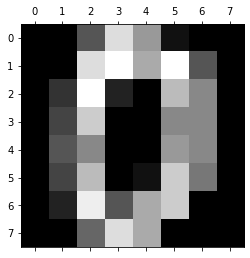

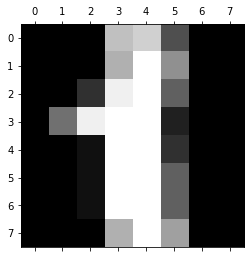

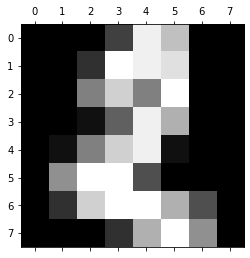

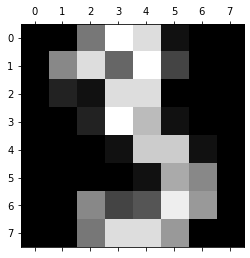

In [10]:
plt.gray()
for i in range(0, 4):
    plt.matshow(digits.images[i])
    
plt.show() 

In [7]:
X = digits.data
y = digits.target

In [12]:
len(X)

1797

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [17]:
clf = KNeighborsClassifier()

In [20]:
grid_params = {
    'n_neighbors': range(3, 8),
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

In [21]:
grid = GridSearchCV(clf, param_grid=grid_params, cv=10, n_jobs=-1)

In [24]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': range(3, 8), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [25]:
grid.best_score_

0.9867780097425192

In [26]:
grid.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 4, 'p': 2, 'weights': 'distance'}

In [27]:
estimator = grid.best_estimator_

На трейне очень даже неплохо, проверим, что на тесте.

In [34]:
estimator.score(X_test, y_test)

0.9805555555555555

In [35]:
y_test_pred = estimator.predict(X_test)

In [39]:
errors = [i for i in range(len(y_test)) if y_test_pred[i] != y_test[i]]
errors

[47, 169, 248, 316, 347, 351, 358]

Predict - Truth
1 - 8


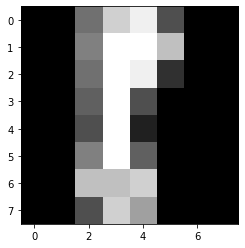

3 - 9


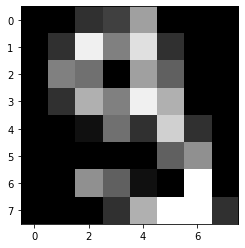

8 - 6


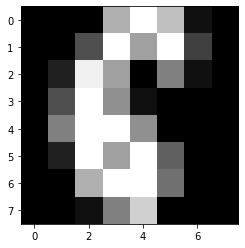

4 - 9


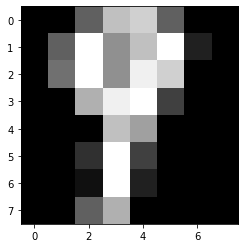

3 - 8


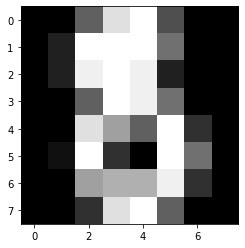

9 - 7


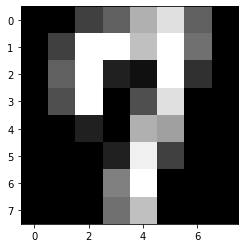

1 - 8


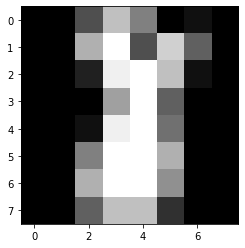

In [48]:
print('Predict - Truth')
for e in errors:
    print(f'{y_test_pred[e]} - {y_test[e]}')
    pixels = X_test[e].reshape(8, 8)
    plt.imshow(pixels, cmap='gray')
    plt.show()    